In [5]:
from dataset import get_loader
from tqdm import tqdm
import torch
import numpy as np
system = 'sst_envs'
model = 'acrobot_obs'
batch = 2
# setup = 'default'
setup = "d_n_aug_itp20"
%cd /media/arclabdl1/HD1/Linjun/mpc-mpnet-py/mpnet

/media/arclabdl1/HD1/Linjun/mpc-mpnet-py/mpnet


In [6]:
train_loader, test_loader = get_loader(system, model, batch_size=batch, setup=setup)

In [7]:
train_loader

In [8]:
for data, label in tqdm(train_loader):
    print(data, label)
    break

  0%|          | 0/72637 [00:00<?, ?it/s]

tensor([[ 4.0000,  0.1730,  0.5917,  0.1775, -0.0291, -0.6398, -0.5875, -0.1797,
          0.2071],
        [ 8.0000, -0.1911, -0.9021, -0.5918,  0.6075,  0.5702,  0.6074,  0.2771,
         -0.3651]]) tensor([[ 0.1944,  0.5922,  0.0753,  0.0590],
        [-0.3132, -0.7682, -0.4392,  0.5445]])


In [9]:
data[0, 1:],label[0]

(tensor([ 0.1730,  0.5917,  0.1775, -0.0291, -0.6398, -0.5875, -0.1797,  0.2071]),
 tensor([0.1944, 0.5922, 0.0753, 0.0590]))

In [10]:
data[1, 1:],label[1]

(tensor([-0.1911, -0.9021, -0.5918,  0.6075,  0.5702,  0.6074,  0.2771, -0.3651]),
 tensor([-0.3132, -0.7682, -0.4392,  0.5445]))

## distributions

In [11]:
inputs, gts = train_loader.dataset.tensors
inputs = inputs[:, 1:]
diff = gts - inputs[:, 4:] 
# diff[diff[:,0] < -np.pi] += 2*np.pi
# diff[diff[:,0] > np.pi] -= 2*np.pi
# diff[diff[:,1] < -np.pi] += 2*np.pi
# diff[diff[:,1] > np.pi] -= 2*np.pi

<IPython.core.display.Javascript object>


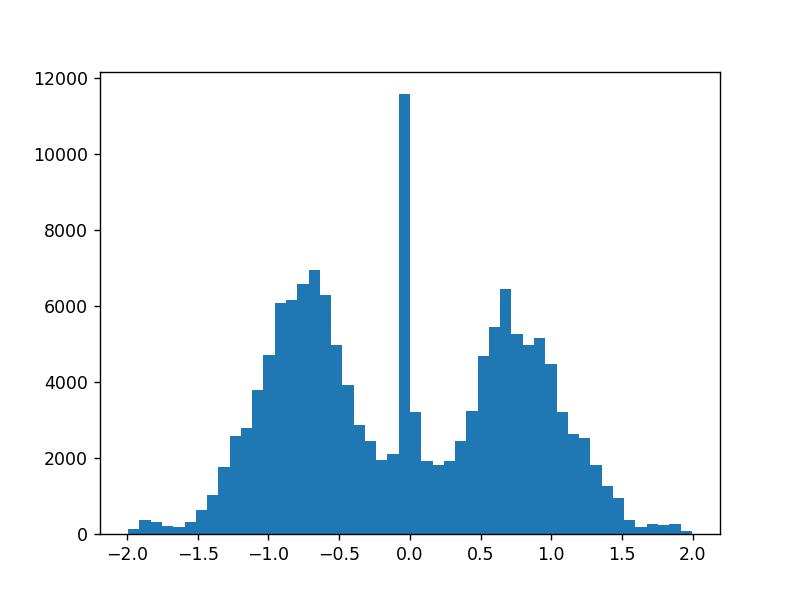

(array([  130.,   372.,   328.,   215.,   186.,   303.,   624.,  1033.,
         1749.,  2583.,  2775.,  3781.,  4694.,  6067.,  6142.,  6583.,
         6933.,  6296.,  4958.,  3909.,  2871.,  2448.,  1935.,  2094.,
        11569.,  3199.,  1919.,  1813.,  1918.,  2445.,  3238.,  4676.,
         5450.,  6450.,  5259.,  4970.,  5159.,  4460.,  3218.,  2627.,
         2524.,  1810.,  1251.,   938.,   373.,   182.,   251.,   227.,
          252.,    86.]),
 array([-1.9910114e+00, -1.9113264e+00, -1.8316414e+00, -1.7519565e+00,
        -1.6722714e+00, -1.5925864e+00, -1.5129014e+00, -1.4332165e+00,
        -1.3535315e+00, -1.2738465e+00, -1.1941614e+00, -1.1144764e+00,
        -1.0347915e+00, -9.5510650e-01, -8.7542152e-01, -7.9573649e-01,
        -7.1605152e-01, -6.3636655e-01, -5.5668151e-01, -4.7699654e-01,
        -3.9731154e-01, -3.1762657e-01, -2.3794156e-01, -1.5825658e-01,
        -7.8571580e-02,  1.1134148e-03,  8.0798410e-02,  1.6048340e-01,
         2.4016839e-01,  3.1985340e-01

In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.hist(diff[:, 0], bins=50)

tensor(14)


<IPython.core.display.Javascript object>


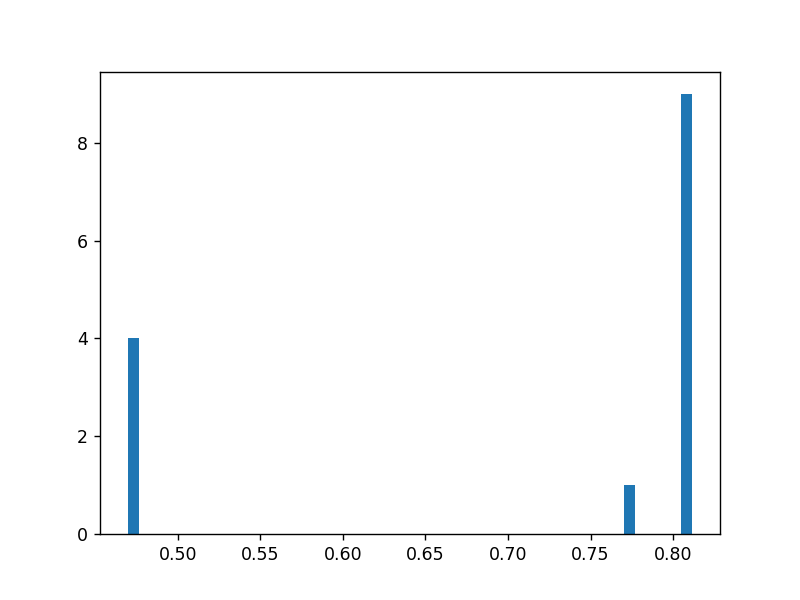

(array([4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 9.]),
 array([0.47005323, 0.4768784 , 0.48370355, 0.49052873, 0.4973539 ,
        0.50417906, 0.5110042 , 0.5178294 , 0.52465457, 0.5314797 ,
        0.5383049 , 0.5451301 , 0.5519552 , 0.55878043, 0.5656056 ,
        0.57243073, 0.57925594, 0.5860811 , 0.59290624, 0.59973145,
        0.6065566 , 0.61338174, 0.62020695, 0.6270321 , 0.63385725,
        0.64068246, 0.6475076 , 0.65433276, 0.66115797, 0.6679831 ,
        0.67480826, 0.6816335 , 0.6884586 , 0.6952838 , 0.702109  ,
        0.7089341 , 0.7157593 , 0.7225845 , 0.72940964, 0.7362348 ,
        0.74306   , 0.74988514, 0.7567103 , 0.7635355 , 0.77036065,
        0.7771858 , 0.784011  , 0.79083616, 0.7976613 , 0.8044865 ,
        0.81131166], dtype=float32),
 <a list of 50 Patch objects>)

In [13]:
%matplotlib notebook
nn_mask = torch.norm(inputs - inputs[22], 2, dim=1) < 0.2
print(nn_mask.sum())
dim = 1
plt.hist(gts[nn_mask, dim], bins=50)
# plt.hist(diff[nn_mask, dim], bins=50)

<IPython.core.display.Javascript object>


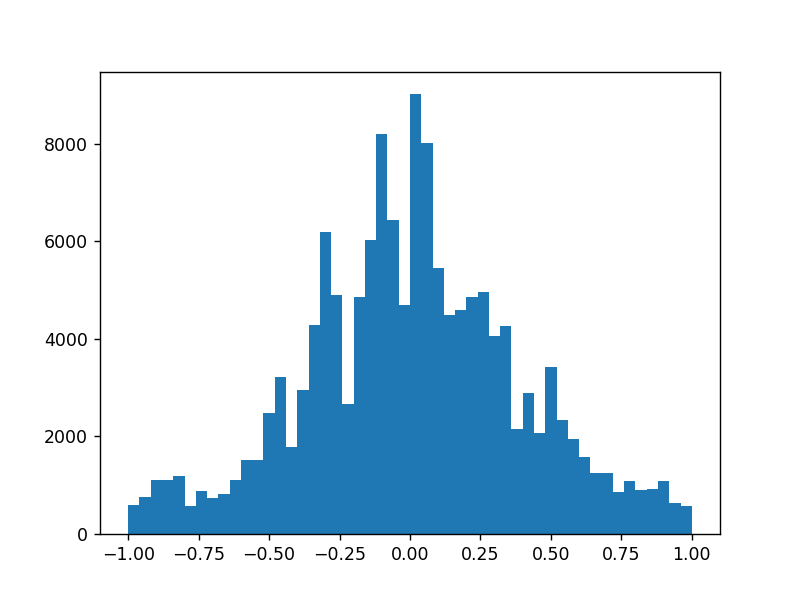

(array([ 598.,  762., 1098., 1107., 1195.,  572.,  889.,  740.,  824.,
        1102., 1510., 1513., 2486., 3218., 1786., 2956., 4292., 6185.,
        4896., 2659., 4851., 6029., 8206., 6442., 4696., 9024., 8012.,
        5465., 4486., 4588., 4855., 4967., 4054., 4268., 2149., 2893.,
        2069., 3415., 2348., 1953., 1570., 1244., 1246.,  857., 1096.,
         895.,  924., 1077.,  639.,  567.]),
 array([-9.9993527e-01, -9.5993727e-01, -9.1993928e-01, -8.7994134e-01,
        -8.3994335e-01, -7.9994535e-01, -7.5994736e-01, -7.1994942e-01,
        -6.7995143e-01, -6.3995343e-01, -5.9995544e-01, -5.5995744e-01,
        -5.1995951e-01, -4.7996151e-01, -4.3996352e-01, -3.9996555e-01,
        -3.5996756e-01, -3.1996956e-01, -2.7997160e-01, -2.3997362e-01,
        -1.9997564e-01, -1.5997764e-01, -1.1997967e-01, -7.9981685e-02,
        -3.9983705e-02,  1.4275312e-05,  4.0012255e-02,  8.0010235e-02,
         1.2000822e-01,  1.6000620e-01,  2.0000419e-01,  2.4000217e-01,
         2.8000015e-01, 

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.hist(gts[:, 0], bins=50)

# Cartpole 

In [20]:
from dataset import get_loader
from tqdm import tqdm
import torch
import numpy as np
system = 'sst_envs'
model = 'cartpole_obs'
batch = 2
# setup = 'default'
setup = "d_n_aug_itp"
%cd /media/arclabdl1/HD1/Linjun/mpc-mpnet-py/mpnet
train_loader, test_loader = get_loader(system, model, batch_size=batch, setup=setup)


/media/arclabdl1/HD1/Linjun/mpc-mpnet-py/mpnet


In [21]:
len( train_loader.dataset)

474185

In [22]:
d, gt = train_loader.dataset[:]
d,gt

(tensor([[ 0.0000,  0.7548, -0.0899,  ..., -0.6875,  0.3787, -1.0000],
         [ 1.0000, -0.3713,  0.1219,  ...,  0.3856, -0.8160,  0.5254],
         [ 7.0000, -0.5733, -0.0175,  ..., -0.0453, -0.0092,  1.0000],
         ...,
         [ 6.0000, -0.4827,  0.1792,  ..., -0.4020,  0.1675, -0.5293],
         [ 2.0000, -0.0229, -0.7277,  ..., -0.4590,  0.4460, -0.7947],
         [ 7.0000,  0.6582, -0.1008,  ...,  0.5974, -0.1559,  0.6583]]),
 tensor([[ 0.7491, -0.1144,  0.0904,  0.2048],
         [-0.3534,  0.1463,  0.1226, -1.0000],
         [-0.5755, -0.0296,  0.8016, -0.2896],
         ...,
         [-0.4557,  0.2254, -0.6190,  1.0000],
         [-0.1189, -0.7125,  0.5933, -0.1257],
         [ 0.6431, -0.1256, -0.1205,  1.0000]]))

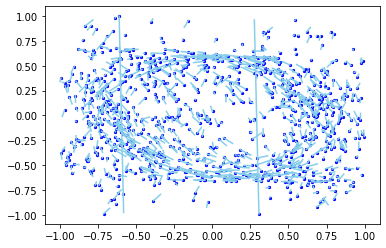

In [27]:
%matplotlib inline
from matplotlib import pyplot as plt
s = d[:, 1:5]

for i in range(1000):
    plt.scatter(s[i, 0], s[i,2], s=5, c='blue')
#     plt.scatter(gt[i, 0], gt[i, 2], s=20, c='green')
    plt.plot([s[i, 0], gt[i, 0]], [s[i, 2], gt[i, 2]], c="skyblue")

## Voxels

In [5]:
env_vox = torch.from_numpy(np.load('{}/{}_env_vox.npy'.format(system, model))).float()[:, 0, :, :]
env_vox.shape

torch.Size([10, 32, 32])

<IPython.core.display.Javascript object>


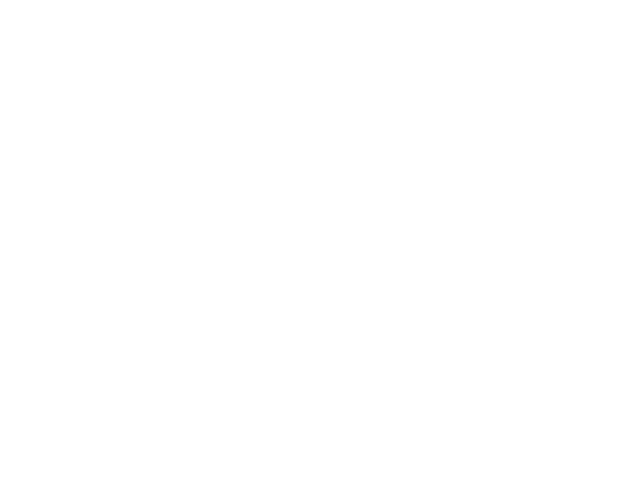

In [6]:
%matplotlib notebook
from matplotlib import pyplot as plt

for i in range(env_vox.shape[0]):
    plt.subplot(4,4,i+1)
    plt.imshow(env_vox[i])

<IPython.core.display.Javascript object>


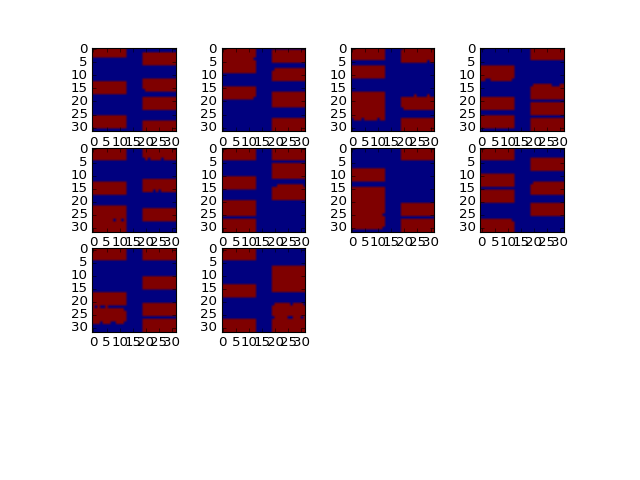

In [7]:
system = 'sst_envs'
model = 'cartpole_obs'
env_vox = torch.from_numpy(np.load('{}/{}_env_vox.npy'.format(system, model))).float()[:, 0, :, :]
env_vox.shape
%matplotlib notebook
from matplotlib import pyplot as plt

for i in range(env_vox.shape[0]):
    plt.subplot(4,4,i+1)
    plt.imshow(env_vox[i])